In [76]:
import tensorflow as tf

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [78]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [79]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [80]:
## Divide the dataset into independent and dependent features

X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [81]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [82]:
X.shape

(10000, 10)

In [83]:
## Feature Engineering
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [84]:
## Concatenate these variable with dataframe
X = X.drop(['Geography', 'Gender'], axis=1)

In [85]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [86]:
X = pd.concat([X, geography, gender], axis=1)

In [87]:
## Splitting the dataset into Training set and Test set
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [89]:
X_train.shape

(8000, 11)

In [90]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler

In [91]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [92]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [93]:
X_train.shape

(8000, 11)

In [94]:
## Part 2: Now lets create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [95]:
## Initialize ANN
classifier = Sequential()

In [96]:
## Adding Input layer
classifier.add(Dense(units=11, activation='relu'))
# Adding dropout layer
classifier.add(Dropout(0.2))

In [97]:
## Adding first hidden layer
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.2))

In [98]:
## Adding Second hidden Layer
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dropout(0.3))

In [99]:
## adding output layer
classifier.add(Dense(1, activation='sigmoid'))

In [100]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [101]:
# # In Order to use custom learing rate
# import tensorflow
# opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

# ## now we can use optimizer=opt

In [102]:
## Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [103]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33,
                               batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.6930 - loss: 0.6357 - val_accuracy: 0.7955 - val_loss: 0.5022
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7776 - loss: 0.5312 - val_accuracy: 0.7955 - val_loss: 0.4750
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7984 - loss: 0.4872 - val_accuracy: 0.7955 - val_loss: 0.4554
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8032 - loss: 0.4701 - val_accuracy: 0.8042 - val_loss: 0.4435
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7996 - loss: 0.4547 - val_accuracy: 0.8046 - val_loss: 0.4368
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8088 - loss: 0.4467 - val_accuracy: 0.8103 - val_loss: 0.4268
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7992 - loss: 0.4478 - val_accuracy: 0.8160 - val_loss: 0.4157
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8060 - loss: 0.4353 - 

In [104]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

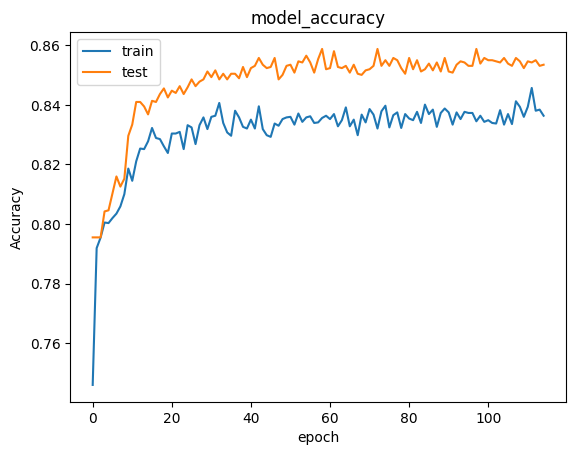

In [105]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [106]:
## Part 3: Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [107]:
## Make confussion metrix
from sklearn.metrics import confusion_matrix

In [108]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1560,   35],
       [ 231,  174]])

In [109]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)

In [110]:
score

0.867

In [111]:
## Get the weights
weights = classifier.get_weights()